<a href="https://colab.research.google.com/github/Abhishek1236/deep-learning-model/blob/master/Lenet_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np 
import keras
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.models import load_model 

In [18]:
class load_data:
  def training():
    (x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1).astype('float32')
    x_train = x_train/255
    y_train = keras.utils.to_categorical(y_train,num_classes=10)
    return x_train,y_train
  def test():
    (x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1).astype('float32')
    x_test = x_test/255
    y_test = keras.utils.to_categorical(y_test,num_classes=10)
    return x_test,y_test

x_train,y_train = load_data.training()
x_test,y_test = load_data.test()

In [24]:
class CNN:
  def forward():
    model = Sequential()
    model.add(Conv2D(6,kernel_size=(5,5),activation= 'relu',input_shape = (28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(16,kernel_size=(5,5),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(120,activation='relu'))
    model.add(Dense(84,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    return model
  def model_training(model,x_train,x_test,y_train,y_test,epochs,batch_size):
    model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test)
    return score
model = CNN.forward()
score = CNN.model_training(model,x_train,x_test,y_train,y_test,epochs=20,batch_size=128)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 448us/step - loss: 0.7158 - accuracy: 0.7371 - val_loss: 0.5247 - val_accuracy: 0.8047
Epoch 2/20
60000/60000 [==============================] - 26s 439us/step - loss: 0.4479 - accuracy: 0.8347 - val_loss: 0.4253 - val_accuracy: 0.8460
Epoch 3/20
60000/60000 [==============================] - 26s 438us/step - loss: 0.3839 - accuracy: 0.8596 - val_loss: 0.3747 - val_accuracy: 0.8639
Epoch 4/20
60000/60000 [==============================] - 26s 439us/step - loss: 0.3484 - accuracy: 0.8727 - val_loss: 0.3681 - val_accuracy: 0.8683
Epoch 5/20
60000/60000 [==============================] - 26s 437us/step - loss: 0.3239 - accuracy: 0.8818 - val_loss: 0.3494 - val_accuracy: 0.8724
Epoch 6/20
60000/60000 [==============================] - 26s 438us/step - loss: 0.3101 - accuracy: 0.8870 - val_loss: 0.3339 - val_accuracy: 0.8788
Epoch 7/20
60000/60000 [==============================]

In [44]:
class_names = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
               5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

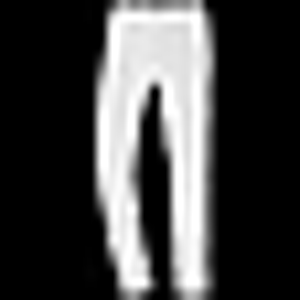

In [53]:
#testing for an image 
from keras.preprocessing.image import array_to_img
from PIL import Image  
data = x_test[2]
b=array_to_img(data)
newsize = (300, 300) 
b = b.resize(newsize)
b

In [54]:

#prediction
model = load_model('/content/lenet.h5')
image  = np.expand_dims(data, axis=0)
y_pred = np.argmax(model.predict(image))
y_actual = np.argmax(y_test[2])
print('predicted label for this image is : ',class_names[y_pred])
print('actual label for this image is : ',class_names[y_actual])

predicted label for this image is :  Trouser
actual label for this image is :  Trouser
